## 1. Import 

### 1.1 Import libraries

In [85]:
# import of packages needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 1.2 import dataset

In [86]:
# import the dataset and store it in a pandas dataframe
df = pd.read_csv('data/data.csv')

In [87]:
# display the first 5 rows of the dataframe
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## 2. Data Standardization

### 2.1 Standardization of columns and values
#### 2.1.1 Columns

In [88]:
# display names of the coluns in the dataframe
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [89]:
# making everhing lowercase and replacing spaces with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')

#### 2.1.2 Treating obejct values

In [90]:
# creating a list of columns with object values
strings = list(df.dtypes[df.dtypes == 'object' ].index)

In [91]:
# stripping white spaces and making everything lowercase
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [92]:
# checking the changes
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


### 2.2 Exploratory Data Analysis

In [93]:
# checking the unique values in each column
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

### 2.2.1 Distribution of price


<Axes: xlabel='msrp', ylabel='Count'>

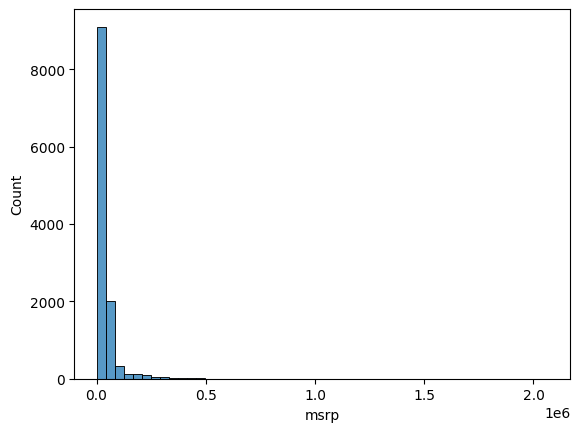

In [94]:
# displaying the distribution of the msrp column
sns.histplot(df.msrp, bins=50)

We can observe a Long Tail Distribution.

A long tail distribution is a type of statistical distribution where a large number of occurrences are found in the tail of the distribution. This means that while a few items are very common, there are many items that are rare. The "long tail" refers to the large number of rare events or items that collectively make up a significant portion of the population or dataset.

<Axes: xlabel='msrp', ylabel='Count'>

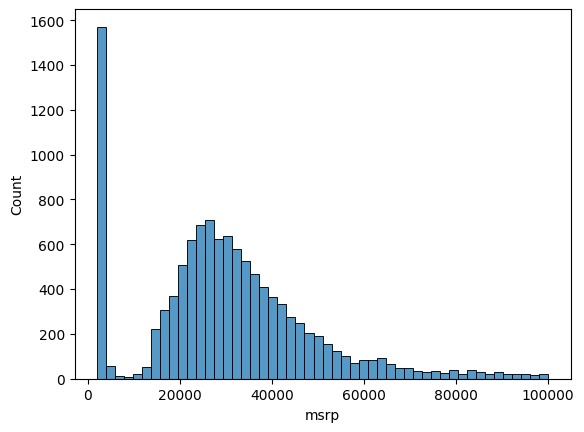

In [95]:
# displaying the distribution of the msrp column
sns.histplot(df.msrp[df.msrp < 100000] , bins=50)

The tail distribution will impact negatively our regression model, then we will apply log to the prices columns to normalize the distribution.

A long tail distribution is a type of statistical distribution where a large number of occurrences are found in the tail of the distribution. This means that while a few items are very common, there are many items that are rare. The "long tail" refers to the large number of rare events or items that collectively make up a significant portion of the population or dataset.

In the context of our regression model, a long tail distribution in the prices can lead to issues such as heteroscedasticity, where the variance of the errors is not constant across all levels of the independent variables. This can violate the assumptions of linear regression and result in a model that does not perform well.

To address this, we can apply a logarithmic transformation to the prices column. This transformation can help to normalize the distribution, reducing the skewness and making the data more suitable for regression analysis. By applying the log transformation, we can stabilize the variance and improve the performance of our regression model.

In [96]:
# log transformation of the msrp column
price_logs = np.log1p(df.msrp)

<Axes: xlabel='msrp', ylabel='Count'>

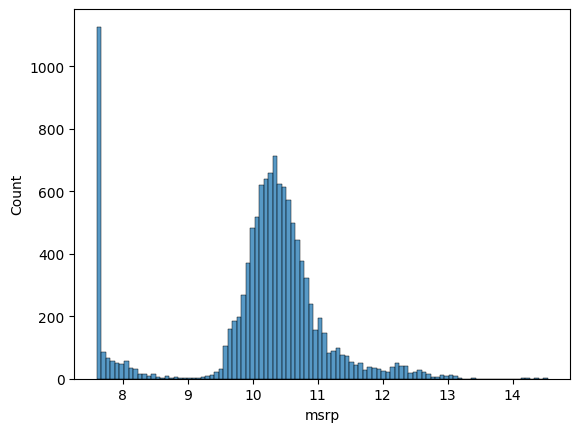

In [97]:
# displaying the distribution of the msrp column
sns.histplot(price_logs, bins=100)

### 2.2.2 Missing Values

In [98]:
# checking the missing values of each columns
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## 3. Modelisation 

### 3.1 Setting up the validation framework
We are going to do it manually without using libraries to see each step.

In this section, we will manually split our dataset into training, validation, and test sets. This approach allows us to understand each step of the process without relying on external libraries. By doing this manually, we gain a deeper understanding of how data is prepared for machine learning models.

First, we will define the number of samples for each set:
- `n_val`: Number of samples in the validation set.
- `n_test`: Number of samples in the test set.

Next, we will use these values to slice our dataset accordingly:
- `df_train`: Contains the data after the validation and test sets.
- `df_val`: Contains the first `n_val` samples.
- `df_test`: Contains the next `n_test` samples after the validation set.

In [99]:
# checking the size of each dataset
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - (n_val + n_test)

In [100]:
# displaying the sizes of each dataset
n_val, n_test, n_train

(2382, 2382, 7150)

In [101]:
# shuffling the indices
idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)

In [102]:
# creating the datasets
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[:n_val]]
df_test = df.iloc[idx[n_val:n_val+n_test]]

In [103]:
# resetting the indices
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [104]:
# transorming target variable into log
y_train = np.log1p(df_train.msrp.values) 
y_test = np.log1p(df_test.msrp.values)
y_val = np.log1p(df_val.msrp.values)

In [105]:
# dropping the target variable from the datasets
df_train = df_train.drop(['msrp'], axis=1)
df_val = df_val.drop(['msrp'], axis=1)
df_test = df_test.drop(['msrp'], axis=1)

### 3.2 Linear Regression

#### 3.1 Linear Regression 

In [106]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [107]:
xi = [453, 11, 86]

In [108]:
# bias term
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [109]:
def linear_regression(xi):
    n = len(xi)
    pred = w0

    for j in range(n):
        pred = pred + xi[j] * w[j]
    return pred

In [110]:
linear_regression(xi)

12.312

In [111]:
print(round(np.expm1(12.312),2))

222347.22


#### 3.2 Linear Regression vector form

In [112]:
def dot(xi, w):
    n = len(xi)
    res = 0.0
    for j in range(n):
        res = res + xi[j] * w[j]
    return res

In [113]:
w_new = [w0] + w

In [114]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [115]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

In [116]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 24, 1385]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)

In [117]:
def linear_regression(X):
    X.dot(w_new)

In [118]:
linear_regression(X)

### 3.3 Training a linear regression model

In [119]:
def train_linear_regression (X, y):
    pass

In [120]:
X = [
    [148, 24, 1385],
    [132, 25, 2035],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 54, 86],
    [38, 23, 185],
    [172, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2035],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   54,   86],
       [  38,   23,  185],
       [ 172,   25,  431],
       [ 453,   31,   86]])

In [121]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [122]:
X = np.column_stack([ones,  X])

In [123]:
y = [10000, 20000, 10050, 35000, 26007, 98000, 22500, 145000, 10032]

In [124]:
XTX = X.T.dot(X)
XTX_inv = np.linalg.inv(XTX)
w_full = XTX_inv.dot(X.T).dot(y)

In [125]:
w0 = w_full[0]
w = w_full[1:]
w0, w

(np.float64(12729.393619114577),
 array([ -69.85884607, 2001.23100193,  -15.5652507 ]))

In [126]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]    

### 3.4 Car Price baseline Model

In [127]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [128]:
base = ['engine_hp','engine_cylinders','highway_mpg', 'city_mpg', 'popularity']

In [129]:
X_train = df_train[base].values

In [130]:
X_train = df_train[base].fillna(0).values

In [131]:
w0, w = train_linear_regression(X_train, y_train)

In [132]:
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

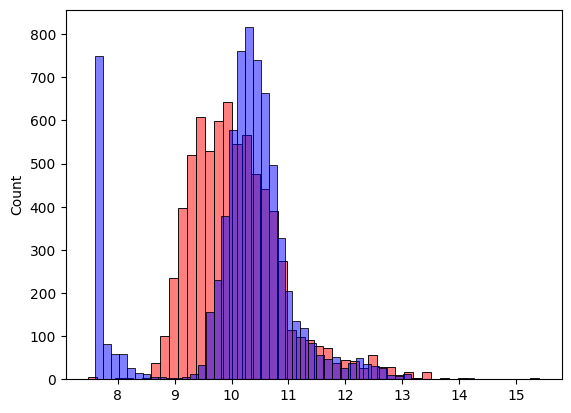

In [133]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

### 3.5 RMSE

In [134]:
def rmse (y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [135]:
rmse(y_train, y_pred)

np.float64(0.7554192603920132)

### 3.6 Validating the model

In [136]:
base = ['engine_hp','engine_cylinders','highway_mpg', 'city_mpg', 'popularity']


In [137]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [138]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.7410452379760701)

### 3.7 Simple feature engineering

In [139]:
def prepare_X(df):
    df = df.copy()

    df['age'] = 2017 - df.year
    features = base + ['age']
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [140]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)


np.float64(0.5223044563173875)

### 3.8 Categorical Variable

In [141]:
makes = list(df.make.value_counts().head().index)

In [142]:
def prepare_X(df):
    df = df.copy()

    df['age'] = 2017 - df.year
    features = base.copy()
    features = base + ['age']
    
    for v in [2,3,4]:
        df['num_doors_%s' % v] = (df_train.number_of_doors == v).astype(int)
        features.append('num_doors_%s' % v)

    for v in makes:
        df['make_%s' % v] = (df.make == v).astype(int)
        features.append('make_%s' % v)
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [143]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.5097894938781208)

In [144]:
categorical_variables = [
    'make', 'engine_fuel_type', 'transmission_type', 'driven_wheels',
      'market_category', 'vehicle_size', 'vehicle_style'
]

In [145]:
categories = {}
for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head().index)

In [146]:
def prepare_X(df):
    df = df.copy()

    df['age'] = 2017 - df.year
    features = base.copy()
    features = base + ['age']
    
    for v in [2,3,4]:
        df['num_doors_%s' % v] = (df_train.number_of_doors == v).astype(int)
        features.append('num_doors_%s' % v)
    for c,values in categories.items():
        for v in values:
            df['%s_%s' % (c,v)] = (df[c] == v).astype(int)
            features.append('%s_%s' % (c,v))
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [147]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(592.3242286438162)

### 3.9 Regularization

In [148]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]    

In [149]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.001)
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.466640651699709)

### 3.10 Tuning the model

In [150]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)

    print(r, w0, score)

0.0 -1.231078404543432e+17 592.3242286438162
1e-05 5.496303518014922 0.4666402869420427
0.0001 6.261887653102815 0.4666403470489286
0.001 6.285524878813878 0.466640651699709
0.1 6.191208652039213 0.4666913100300122
1 5.634896668484315 0.4677695489537715
10 4.283980108968702 0.48088892410262607


In [151]:
r = 0.0001
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)


np.float64(0.4666403470489286)

### 3.11 Using the model

In [152]:
df_full_train = pd.concat([df_train, df_val])

In [153]:
df_full_train = df_full_train.reset_index(drop=True)

In [154]:
X_full_train = prepare_X(df_full_train)

In [155]:
y_full_train = np.concatenate([y_train, y_val], axis=0)

In [156]:
r = 0.0001
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=r)

In [157]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

np.float64(0.46831006698864597)

In [158]:
car = df_test.iloc[20].to_dict()

In [159]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,acura,ilx,2017,premium_unleaded_(recommended),201.0,4.0,automated_manual,front_wheel_drive,4.0,luxury,compact,sedan,35,25,204


In [160]:
X_small = prepare_X(df_small)

In [161]:
y_pred = w0 + X_small.dot(w)

In [162]:
ypred = y_pred[0]
np.expm1(ypred)

np.float64(38918.15878906355)

In [163]:
np.expm1(y_test[20])

np.float64(29289.999999999978)